In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [17]:
import seaborn as sns


In [2]:
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [5]:
df=pd.read_excel("data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3,NaN,NaN,NaN,NaN,NaN
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0,NaN,NaN,NaN,NaN,NaN
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5,NaN,NaN,NaN,NaN,NaN
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0,NaN,NaN,NaN,NaN,NaN
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0,NaN,NaN,NaN,NaN,NaN


In [6]:
data= df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]


In [7]:
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0


In [8]:
X= data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']]


In [9]:
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566


In [10]:
Y= data['X11']


In [11]:
Y.head()

0     4.3
1    10.0
2    17.5
3    31.0
4    34.0
Name: X11, dtype: float64

In [15]:
#We check the number of unique values in each column
a=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
for i in a:
    print(len(X[i].unique()))

18
17
17
8
18
17
9
14
55
52


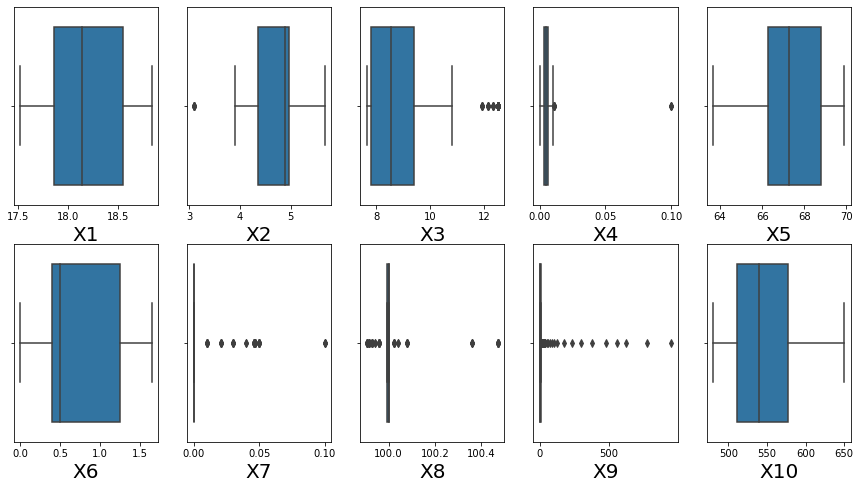

In [19]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot o
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(X.columns, ax.flatten()):
    z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  


In [20]:
#this code reduces the  above outliers seen. This is done by chaning the values in the box plot based on inter quantile range 
for i in X.columns:
    q1=X[i].quantile(0.25)
    q3=X[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=X[i].quantile(0.99)
    lc=X[i].quantile(0.01)
    for ind1 in X[i].index:
        if X.loc[ind1, i] >ub:            
            X.loc[ind1, i] =uc
        if X.loc[ind1, i] < lb:
            X.loc[ind1, i] =lc


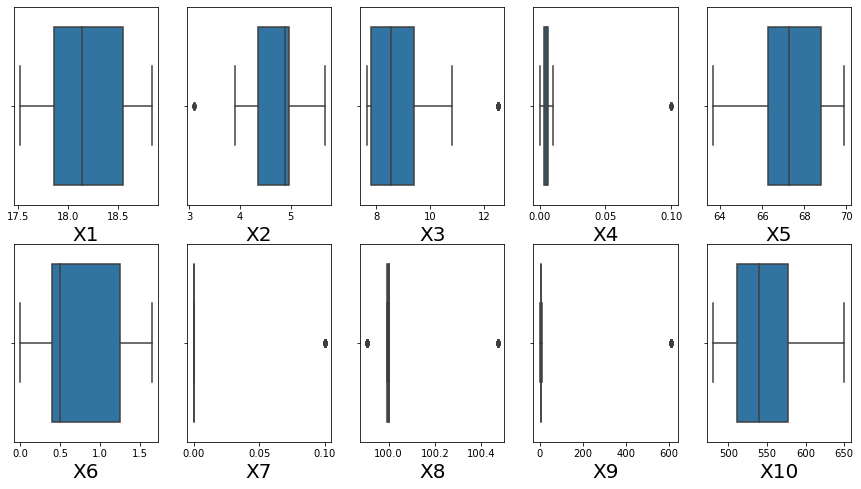

In [40]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot o
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(X.columns, ax.flatten()):
    z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

# Principal Component Analysis

In [49]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [50]:
X_pca.shape

(219, 8)

In [51]:
PCA_df = pd.DataFrame(data = X_pca)
PCA_df.head()

,0,1,2,3,4,5,6,7
0,-0.562264,-0.624432,-0.246039,0.218947,0.021905,-0.153706,0.063274,0.163968
1,-0.562359,-0.624287,-0.245671,0.219044,0.022153,-0.153784,0.063291,0.163949
2,-0.562518,-0.624045,-0.245058,0.219204,0.022567,-0.153914,0.063320,0.163917
3,-0.563154,-0.623079,-0.242607,0.219845,0.024222,-0.154435,0.063436,0.163792
4,-0.564427,-0.621147,-0.237704,0.221127,0.027533,-0.155475,0.063668,0.163540


# AutoEncoder

In [53]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [54]:
X_ae.shape

(219, 3)

In [63]:
from keras import regularizers
batch_size = 32
input_dim = X_train[0].shape[0] #num of predictor variables 
learning_rate = 1e-5
input_layer = Input(shape=(input_dim, ), name="input")
#Input Layer
encoder = Dense (2000, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
#Encoder’s first dense layer
encoder = Dense (1000, activation="relu",
activity_regularizer=regularizers.l1(learning_rate))(encoder)
#Encoder’s second dense layer
encoder = Dense (500, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Code layer
encoder = Dense (200, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s first dense layer
decoder = Dense(500, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s second dense layer
decoder = Dense(1000, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Decoder’s Third dense layer
decoder = Dense(2000, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Output Layer
decoder = Dense(input_dim, activation="sigmoid", activity_regularizer=regularizers.l1(learning_rate))(decoder)

In [65]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_1 = autoencoder_1.fit(X_train, X_train,epochs=200,batch_size=batch_size)


Epoch 1/200
6/6 [==============================] - 2s 41ms/step - loss: 0.1294 - accuracy: 0.1486
Epoch 2/200
6/6 [==============================] - 0s 34ms/step - loss: 0.0815 - accuracy: 0.1143
Epoch 3/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0503 - accuracy: 0.2400
Epoch 4/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0367 - accuracy: 0.3200
Epoch 5/200
6/6 [==============================] - 0s 44ms/step - loss: 0.0302 - accuracy: 0.3714
Epoch 6/200
6/6 [==============================] - 0s 40ms/step - loss: 0.0231 - accuracy: 0.5257
Epoch 7/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0185 - accuracy: 0.4229
Epoch 8/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0159 - accuracy: 0.4286
Epoch 9/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0143 - accuracy: 0.5714
Epoch 10/200
6/6 [==============================] - 0s 38ms/step - loss: 0.0138 - accuracy: 0.5714
Epoch 11/200
6/6 [=

6/6 [==============================] - 0s 37ms/step - loss: 0.0017 - accuracy: 0.8286
Epoch 84/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0016 - accuracy: 0.8114
Epoch 85/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0016 - accuracy: 0.8229
Epoch 86/200
6/6 [==============================] - 0s 36ms/step - loss: 0.0016 - accuracy: 0.8400
Epoch 87/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0016 - accuracy: 0.8000
Epoch 88/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - accuracy: 0.8400
Epoch 89/200
6/6 [==============================] - 0s 35ms/step - loss: 0.0017 - accuracy: 0.8057
Epoch 90/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - accuracy: 0.8000
Epoch 91/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - accuracy: 0.8171
Epoch 92/200
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - accuracy: 0.8114
Epoch 93/200
6/6 [=====

Epoch 164/200
6/6 [==============================] - 0s 40ms/step - loss: 7.4961e-04 - accuracy: 0.8114
Epoch 165/200
6/6 [==============================] - 0s 41ms/step - loss: 7.3213e-04 - accuracy: 0.8057
Epoch 166/200
6/6 [==============================] - 0s 40ms/step - loss: 7.2070e-04 - accuracy: 0.8114
Epoch 167/200
6/6 [==============================] - 0s 37ms/step - loss: 7.1230e-04 - accuracy: 0.8057
Epoch 168/200
6/6 [==============================] - 0s 42ms/step - loss: 7.0932e-04 - accuracy: 0.8171
Epoch 169/200
6/6 [==============================] - 0s 41ms/step - loss: 7.0046e-04 - accuracy: 0.8114
Epoch 170/200
6/6 [==============================] - 0s 43ms/step - loss: 6.9115e-04 - accuracy: 0.8057
Epoch 171/200
6/6 [==============================] - 0s 39ms/step - loss: 6.8383e-04 - accuracy: 0.8057
Epoch 172/200
6/6 [==============================] - 0s 39ms/step - loss: 6.7618e-04 - accuracy: 0.8057
Epoch 173/200
6/6 [==============================] - 0s 40ms/ste

In [68]:
autoencoder_2_input = autoencoder_1.predict(X_train)
autoencoder_2_input = np.concatenate((autoencoder_2_input , X_train))


In [69]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_2 = autoencoder_2.fit(autoencoder_2_input, autoencoder_2_input,epochs=100,batch_size=batch_size)


Epoch 1/100
11/11 [==============================] - 2s 35ms/step - loss: 0.0010 - accuracy: 0.8714
Epoch 2/100
11/11 [==============================] - 0s 36ms/step - loss: 8.3606e-04 - accuracy: 0.8771
Epoch 3/100
11/11 [==============================] - 0s 38ms/step - loss: 6.8580e-04 - accuracy: 0.8571
Epoch 4/100
11/11 [==============================] - 1s 47ms/step - loss: 7.0076e-04 - accuracy: 0.8714
Epoch 5/100
11/11 [==============================] - 0s 39ms/step - loss: 7.3781e-04 - accuracy: 0.8771
Epoch 6/100
11/11 [==============================] - 0s 40ms/step - loss: 7.1291e-04 - accuracy: 0.8971
Epoch 7/100
11/11 [==============================] - 0s 40ms/step - loss: 6.7314e-04 - accuracy: 0.8686
Epoch 8/100
11/11 [==============================] - 0s 38ms/step - loss: 9.3461e-04 - accuracy: 0.8829
Epoch 9/100
11/11 [==============================] - 0s 39ms/step - loss: 7.2502e-04 - accuracy: 0.8743
Epoch 10/100
11/11 [==============================] - 0s 39ms/step -

11/11 [==============================] - 0s 43ms/step - loss: 5.1322e-04 - accuracy: 0.8743
Epoch 81/100
11/11 [==============================] - 0s 42ms/step - loss: 5.0897e-04 - accuracy: 0.8771
Epoch 82/100
11/11 [==============================] - 0s 42ms/step - loss: 5.0624e-04 - accuracy: 0.8771
Epoch 83/100
11/11 [==============================] - 0s 42ms/step - loss: 5.0230e-04 - accuracy: 0.8829
Epoch 84/100
11/11 [==============================] - 0s 41ms/step - loss: 4.9833e-04 - accuracy: 0.8800
Epoch 85/100
11/11 [==============================] - 0s 45ms/step - loss: 4.9492e-04 - accuracy: 0.8829
Epoch 86/100
11/11 [==============================] - 0s 43ms/step - loss: 4.9154e-04 - accuracy: 0.8829
Epoch 87/100
11/11 [==============================] - 0s 43ms/step - loss: 4.8954e-04 - accuracy: 0.8800
Epoch 88/100
11/11 [==============================] - 0s 43ms/step - loss: 4.8519e-04 - accuracy: 0.8829
Epoch 89/100
11/11 [==============================] - 0s 43ms/step -

In [72]:
autoencoder_3_input = autoencoder_2.predict(autoencoder_2_input)
autoencoder_3_input = np.concatenate((autoencoder_3_input, autoencoder_2_input))


In [73]:
autoencoder_3 = Model(inputs=input_layer, outputs=decoder)
autoencoder_3.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
satck_3 = autoencoder_3.fit(autoencoder_3_input, autoencoder_3_input, epochs=50, batch_size=16)

Epoch 1/50
44/44 [==============================] - 3s 29ms/step - loss: 0.0012 - accuracy: 0.9000
Epoch 2/50
44/44 [==============================] - 1s 28ms/step - loss: 7.1759e-04 - accuracy: 0.8786
Epoch 3/50
44/44 [==============================] - 1s 29ms/step - loss: 5.6472e-04 - accuracy: 0.8943
Epoch 4/50
44/44 [==============================] - 1s 29ms/step - loss: 4.6410e-04 - accuracy: 0.9014
Epoch 5/50
44/44 [==============================] - 1s 30ms/step - loss: 4.2448e-04 - accuracy: 0.9086
Epoch 6/50
44/44 [==============================] - 1s 29ms/step - loss: 4.1554e-04 - accuracy: 0.9200
Epoch 7/50
44/44 [==============================] - 1s 29ms/step - loss: 4.1043e-04 - accuracy: 0.9257
Epoch 8/50
44/44 [==============================] - 1s 29ms/step - loss: 4.6981e-04 - accuracy: 0.9100
Epoch 9/50
44/44 [==============================] - 1s 29ms/step - loss: 6.8940e-04 - accuracy: 0.9000
Epoch 10/50
44/44 [==============================] - 1s 29ms/step - loss: 0.0

AttributeError: 'History' object has no attribute 'predict'

# independent 

In [83]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
X_ica = pd.DataFrame(data = X_ica)


In [84]:
X_ica.head()

,0,1,2,3,4,5,6,7
0,0.041642,-0.010160,-0.026587,-0.055216,0.050050,0.027155,0.123657,-0.027799
1,0.041547,-0.010157,-0.026574,-0.055213,0.050054,0.027143,0.123680,-0.027806
2,0.041388,-0.010153,-0.026552,-0.055208,0.050062,0.027123,0.123717,-0.027819
3,0.040754,-0.010135,-0.026466,-0.055186,0.050093,0.027045,0.123864,-0.027868
4,0.039484,-0.010100,-0.026293,-0.055144,0.050154,0.026889,0.124160,-0.027968
